In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math
from glob import glob
%matplotlib inline

from DL_attacks.logger import Logger
from DL_attacks.plotting import *

XLABEL = "Generalization error"
YLABEL = "Privacy risk (normalized $M$)"

# Setup Parsers

In [2]:
from DL_attacks.plotting import get_gen_error, load_parse_aggregated_logs, plot_consesus, parser_avg_on_neighbors, parser_avg_all, parse_avg_id

parser_dl = {
    'iteration': parse_avg_id,
    'distance' : parser_avg_all,
    
    'loss_on_test': parser_avg_all,
    'loss_on_train':parser_avg_all, 
        
    'accuracy_on_test': parser_avg_all,
    'accuracy_on_train':parser_avg_all, 
    
    'MIA_received_model': parser_avg_on_neighbors,
    'MIA_isolated_model': parser_avg_on_neighbors,
}

parser_fl = {
    'iteration': parse_avg_id,

    'loss_on_test': parser_avg_all,
    'loss_on_train':parser_avg_all, 
    
    'accuracy_on_test': parser_avg_all,
    'accuracy_on_train':parser_avg_all, 
    
    'MIA_local_model': parser_avg_on_neighbors,
} 

# Plot [Torus36 vs Federated36]

Aggregating: ./results/*-cifar10-federated36. Results averaged over 10 runs.
Aggregating: ./results/*-cifar10-torus36. Results averaged over 10 runs.


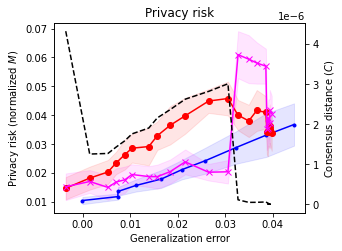

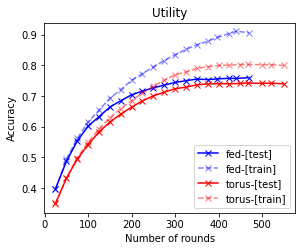

In [5]:
from DL_attacks.plotting import plot_MIAs, plot_utility

x_axis_gen_error = True
# entropy-based mias
metric = 1

fed = load_parse_aggregated_logs("./results/*-cifar10-federated36", parser_fl, metric)
torus = load_parse_aggregated_logs("./results/*-cifar10-torus36", parser_dl, metric)

if x_axis_gen_error:
    xlimcut = get_gen_error(torus).max()
else:
    xlimcut = torus['iteration'][1].max()

fig, ax = plt.subplots(1, 1, figsize=(4.5, 3.5))
ax, _ = plot_MIAs(
    fed,
    "MIA_local_model",
    color='blue',
    label='Global model (Federated)',
    ax=ax,
    xlimcut=xlimcut,
    marker='.',
    x_axis_gen_error=x_axis_gen_error
)

ax, xcut = plot_MIAs(
    torus,
    "MIA_received_model",
    color='red',
    label='Received model',
    linestyle='-',
    marker='o',
    ax=ax,
    xlimcut=xlimcut,
    x_axis_gen_error=x_axis_gen_error
)

ax, _ = plot_MIAs(
    torus,
    "MIA_isolated_model",
    color='magenta',
    label='Marginalized model',
    linestyle='-',
    marker='x',
    ax=ax,
    xlimcut=xlimcut,
    x_axis_gen_error=x_axis_gen_error
)

ax.set(
    xlabel=XLABEL,
    ylabel=YLABEL,
    title='Privacy risk'
);

plot_consesus(torus, ax, xcut)

fig2, ax2 = plt.subplots(1, 1, figsize=(4.5, 3.5))
ax2 = plot_utility(ax2, fed, 'fed', 'blue');
ax2 = plot_utility(ax2, torus, 'torus', 'red');
ax2.set(
    xlabel="Number of rounds",
    ylabel="Accuracy",
    title="Utility"
);